<a href="https://colab.research.google.com/github/csabiu/cosmology-class/blob/main/SNe1a_Dark_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Package for MCMC:
pip install emcee
pip install corner

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# class for CPL model (w0,wa)
from astropy.cosmology import Flatw0waCDM


# Note

This model was first proposed by Chevallier and Polarski (2001) and Linder (2002). It is just a Taylor expansion of the equation of state at $a=1$, and has been *widely* used by the community to study the low-$z$ behaviour of dark energy. However, we shouldn't take this as a serious dark energy model, it is just a tool to study DE. 

# How does $\rho(a)$ evolve?

$$w = \frac P \rho = w_0 + w_a (1-a) = w0 + w_a \frac z{1+z}$$
From the equation slide #6: 
$$\mathrm{d}(\rho c^2 a^3) + 3 w c^2 a^2 \mathrm{d} a = 0 $$
$$\frac{\mathrm{d}\rho}{\rho} = -3(1+w) \frac{\mathrm{d} a}{a} = -3\left(\frac{1+w_0+w_a}a - w_a\right) \mathrm{d}a$$.

Integrating from $a$ to $a_0=1$, we find:
$$\left[\ln \rho\right]_{\rho(a)}^{\rho_0} = -3\left[(1+w_0+w_a)\left[\ln a\right]_{a}^{ 1} - w_a (1-a)\right], $$
Finally, 
$$\rho(a) = \rho_0 a^{-3(1+w_0+w_a)}e^{-3w_a(1-a)}.$$
Clearly, for $w_0 =-1, w_a = 0$, we recover $\Lambda$CDM: \rho(a) = \rho_0$.

Let's verify numerically for arbitrary $(w_0,w_a)$:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/astropy/cosmology/core.py:2802: RuntimeWarning: invalid value encountered in multiply
  return self._w0 + self._wa * z / (1.0 + z)
/usr/local/lib/python3.7/dist-packages/astropy/cosmology/core.py:2802: RuntimeWarning: invalid value encountered in true_divide
  return self._w0 + self._wa * z / (1.0 + z)
/usr/local/lib/python3.7/dist-packages/astropy/cosmology/core.py:2802: RuntimeWarning: invalid value encountered in true_divide
  return self._w0 + self._wa * z / (1.0 + z)
/usr/local/lib/python3.7/dist-packages/astropy/cosmology/core.py:2833: RuntimeWarning: invalid value encountered in multiply
  np.exp(-3 * self._wa * z / zp1)
/usr/local/lib/python3.7/dist-packages/astropy/cosmology/core.py:2833: RuntimeWarning: invalid value encountered in true_divide
  np.exp(-3 * self._wa * z / zp1)
/usr/local/lib/python3.7/dist-packages/a

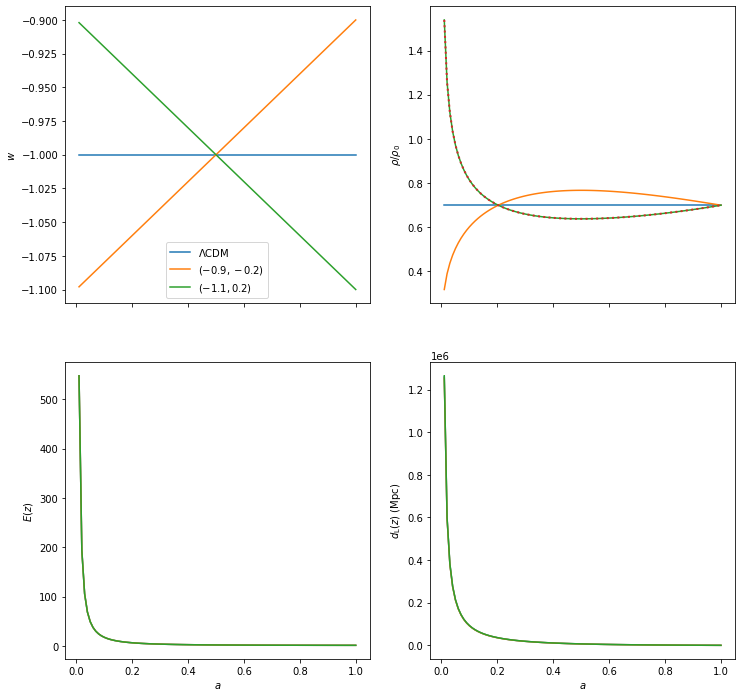

In [ ]:
# Define a cosmology:
Om0 = 0.3
# this is LCDM: 
w0_0 = -1
wa_0 = 0. 

# two different choices of (w0,wa):
w0_1 = -0.9
wa_1 = -0.2
w0_2 = -1.1
wa_2 = 0.2

H0 = 70 # km/s/Mpc

cosmo0 = Flatw0waCDM(Om0=Om0,H0=H0,w0=w0_0,wa=wa_0,name="$\Lambda$CDM")
cosmo1 = Flatw0waCDM(Om0=Om0,H0=H0,w0=w0_1,wa=wa_1,name="$({},{})$".format(w0_1,wa_1))
cosmo2 = Flatw0waCDM(Om0=Om0,H0=H0,w0=w0_2,wa=wa_2,name="$({},{})$".format(w0_2,wa_2))

# plot w(a)
aa = np.linspace(0,1,num=101)
fig,ax = plt.subplots(2,2,sharex=True,figsize=(12,12))
iax = ax[0,0]
# careful: cosmo0.w takes z as an argument, not a!
zz = 1./(aa)-1. 

for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(aa,mycosmo.w(zz),label=mycosmo.name)
iax.set_ylabel("$w$")
iax.legend()
# Linear between w(a=1) = w0, w(a=0) = w0+wa

# energy evolution: 
iax = ax[0,1]
# de_density_scale =  rho_de(z)/rho_de(0) 
for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(aa,mycosmo.Ode0*mycosmo.de_density_scale(zz))
# checking that the expression we calculated agrees with astropy: 
iax.plot(aa, cosmo2.Ode0*aa**(-3*(1+w0_2+wa_2))*np.exp(-3*wa_2*(1-aa)),ls=':',lw=2)
# Yay! The red dotted lines agree with the sold green line!
iax.set_ylabel(r"$\rho/\rho_0$")

iax = ax[1,0]
iax.set_ylabel("$E(z)$")

for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(aa,mycosmo.efunc(zz))

iax = ax[1,1]
iax.set_ylabel("$d_\mathrm{L}(z)$ (Mpc)")
for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(aa,mycosmo.luminosity_distance(zz))

for iax in ax[-1,:]:
  iax.set_xlabel("$a$")



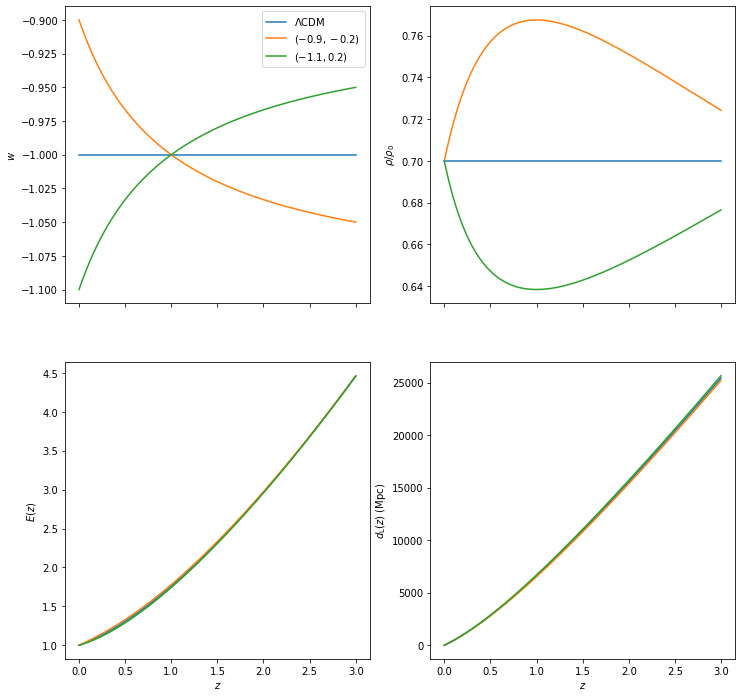

In [ ]:
# As a function of redshift:


# plot w(a)
zz = np.linspace(0,3,num=301)
fig,ax = plt.subplots(2,2,sharex=True,figsize=(12,12))
iax = ax[0,0]
# careful: cosmo0.w takes z as an argument, not a!
iax.set_ylabel("$w$")
for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(zz,mycosmo.w(zz),label=mycosmo.name)

iax.legend()
# Linear between w(a=1) = w0, w(a=0) = w0+wa

# energy evolution: 
iax = ax[0,1]
iax.set_ylabel(r"$\rho/\rho_0$")
for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(zz,mycosmo.Ode0*mycosmo.de_density_scale(zz))

iax = ax[1,0]
iax.set_ylabel("$E(z)$")

for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(zz,mycosmo.efunc(zz))

iax = ax[1,1]
iax.set_ylabel("$d_\mathrm{L}(z)$ (Mpc)")
for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot(zz,mycosmo.luminosity_distance(zz))

for iax in ax[-1,:]:
  iax.set_xlabel("$z$")



# Pantheon data:

In [ ]:
import pandas as pd
pan = pd.read_csv("https://raw.githubusercontent.com/dscolnic/Pantheon/master/lcparam_full_long.txt",delim_whitespace=True)
pan

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Thoth,1.30500,1.30500,0.0,25.26420,0.23500,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1044,Vilas,0.93500,0.93500,0.0,24.26660,0.16580,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1045,SCP05D0,1.01400,1.01400,0.0,24.85445,0.22910,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1046,SCP05D6,1.31500,1.31500,0.0,25.54235,0.19870,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
# We only need columns: ['zsmb', 'mb', 'dmb']:
pan = pan.loc[:,['zcmb','mb','dmb']]
zz = pan['zcmb'].values
mb = pan['mb'].values
dmb = pan['dmb'].values

<ErrorbarContainer object of 3 artists>

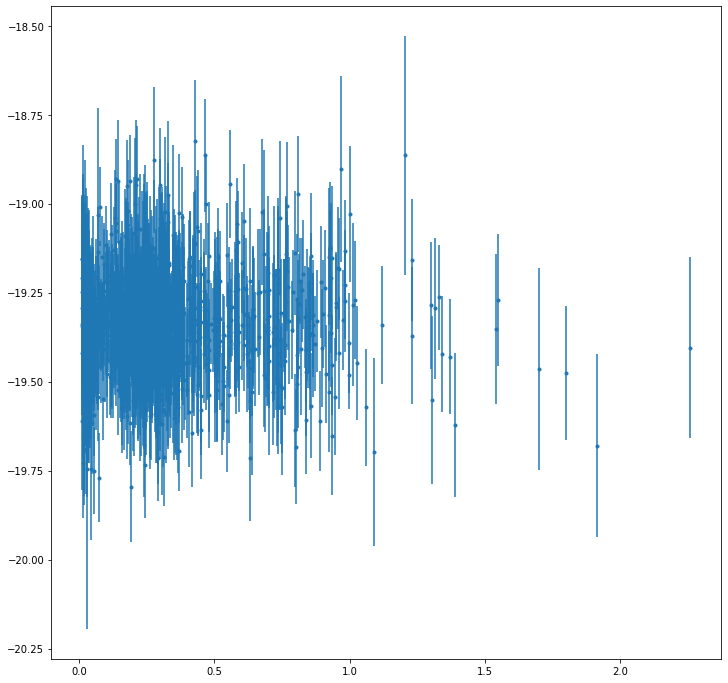

In [ ]:
fig,ax = plt.subplots(1,figsize=(12,12))

# plot residuals with respect to cosmo0 for more visibility
ax.errorbar(zz, mb-cosmo0.distmod(zz).value,dmb,ls='',marker='.')
# we note that the residuals is around -19.3. This is because Pantheon reports m_B, not mu. 
# Let's add a constant 19.3 for now.: 

<ErrorbarContainer object of 3 artists>

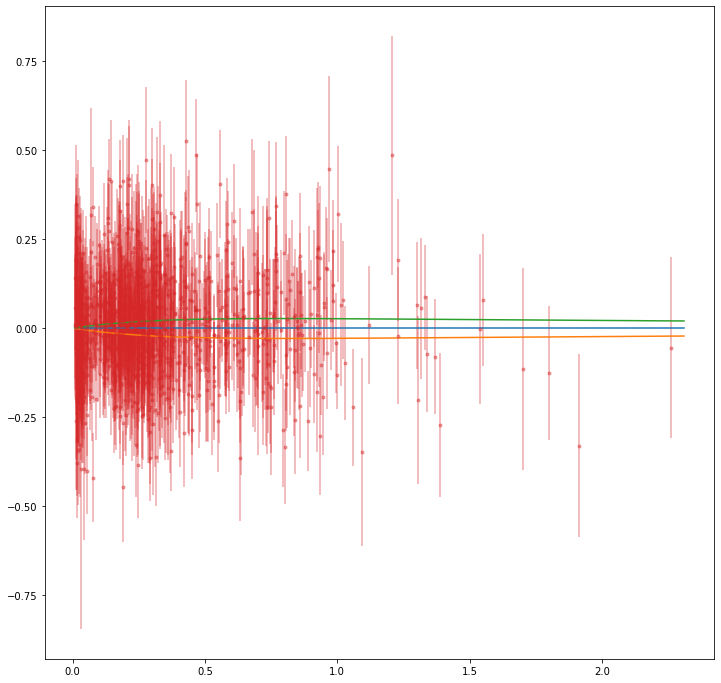

In [ ]:
fig,ax = plt.subplots(1,figsize=(12,12))

MB = -19.35
# Now, the resuduals are around 0: 
iax = ax
z0 = np.linspace(0.01,2.31,num=230)
for mycosmo in [cosmo0,cosmo1,cosmo2]:
  iax.plot (z0, mycosmo.distmod(z0)-cosmo0.distmod(z0))
iax.errorbar(zz, mb-cosmo0.distmod(zz).value-MB,dmb,ls='',marker='.',alpha=.4)

# Find the best fit cosmology: 



In [ ]:
Csys = np.loadtxt("https://raw.githubusercontent.com/dscolnic/Pantheon/master/sys_full_long.txt")
print (Csys.shape)
# Need to reshape: 
Nsn = len(zz)
Csys = Csys[1:].reshape((Nsn,Nsn))
print (Csys.shape)

(1098305,)
(1048, 1048)


In [ ]:
# Total covariance = Systematic + Statistical: 
Ctot = Csys + np.diag(dmb**2)

In [ ]:
from scipy import optimize


# cost function to optimize: 

# SNIa do not constrain H0, let's fix H0 to 70. This doesn't matter, we could choose to fix it to any value. 
# The constrained quantity is -5 \log_10{H0} + MB. 
H0 = 70

def residuals(theta, yy, zz, icov):
  '''returns the residuals mu for the input parameters. 
  Input: 
  theta: vector of parameters (Omega_m, w0,wa,MB)
  yy: mB = mu+MB
  zz: redshift
  icov: inverse covariance matrix'''

  Om,w0,wa,MB = theta
  dy = Flatw0waCDM(Om0=Om,H0=H0,w0=w0,wa=wa).distmod(zz).value - yy + MB
  return dy.T @ icov @ dy

# Here i chose the differential evolution algorithm. You can choose different algorithms and check how it affects the results. 
# Hopefully, it shouldn't affect them much!
# the first argument is the cost function (residuals)
# the second argument is the bounds of the parameters. 
# the third is the arguments passed to residuals: (yy,zz,icov)

# better to invert the matrix beforehands, so we only do it once!
icov = np.linalg.inv(Ctot)
bounds = ((0,1),(-2,0),(-2,2),(-30,-10))
args = (mb,zz,icov)
res = optimize.differential_evolution(residuals,bounds,args=args)
  


In [ ]:
res


     fun: 1026.7390403411255
     jac: array([-0.00593445, -0.00291038,  0.        ,  0.02564775])
 message: 'Optimization terminated successfully.'
    nfev: 1550
     nit: 22
 success: True
       x: array([  0.3482699 ,  -1.04909051,  -0.68518033, -19.34896946])

In [ ]:
from IPython.display import display, Math, Latex

# the results seem reasonable: 
Om,w0,wa,MB = res.x
display(Math (" \Omega_m = {:.2f}".format(Om)))
display(Math ("w_0 = {:.2f}".format(w0)))
display(Math ("w_a= {:.2f}".format(wa)))
display(Math ("M_B = {:.2f}".format(MB)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# MCMC analysis

We need to write a likelihood and a prior function. 
We will choose flat (uniform) priors for the parameters. 

In [ ]:
# priors: 
priors = {"Om":[0,1],
          "w0":[-2,0],
          "wa":[-2,2],
          "MB":[-30,-10]
          }
def lnpi(theta,priors):
  Om,w0,wa,MB = theta
  if (priors['Om'][0]<Om<priors['Om'][1]) and (priors['w0'][0]<w0<priors['w0'][1]) and   (priors['wa'][0]<wa<priors['wa'][1]) and   (priors['MB'][0]<MB<priors['MB'][1]):
    return 0
  else:
    return -np.inf





In [ ]:
# Likelihood: ln L \propto -\chi2/2
def lnL(theta,mB,zz,icov):
  Om,w0,wa,MB = theta
  dy = Flatw0waCDM(Om0=Om,H0=H0,w0=w0,wa=wa).distmod(zz).value -mB +MB
  chi2 = dy.T @ icov @ dy
  return -.5*chi2



In [ ]:
# posterior: what we want to sample: 
def lnp (theta,mB,zz,icov):
  lp = lnpi(theta,priors)
  if lp == -np.inf:
    return lp
  return lnL(theta,mB,zz,icov) + lp

In [ ]:
# Using emcee for the sampling. Feel free to use a different sampler. 
import emcee
ndim = 4 # Om,w0,wa,MB
nwalkers = 12 # let's try this number

# initial position: small random perturbation around the best-fit: 
p0 = res.x + 1.e-4*np.random.randn(nwalkers, ndim)
niter = 2000
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, lnp, args=(mb,zz,icov)
)
sampler.run_mcmc(p0, niter, progress=True)

100%|██████████| 2000/2000 [08:34<00:00,  3.89it/s]


State([[  0.41493203  -1.45226414   0.10906975 -19.36645831]
 [  0.30012872  -0.97609035  -0.57185088 -19.34319032]
 [  0.34790242  -1.01611648  -0.7723992  -19.3402854 ]
 [  0.34661208  -1.17409216  -0.79823881 -19.3772273 ]
 [  0.3955044   -1.04882784  -1.88651188 -19.34447595]
 [  0.03813054  -0.69386998   0.57781603 -19.34218371]
 [  0.36445577  -0.90535065  -1.0094322  -19.31455663]
 [  0.3650837   -1.09752931  -0.344867   -19.33702266]
 [  0.35258512  -1.01371394  -1.61038751 -19.35964477]
 [  0.3384202   -1.01430973  -0.80230263 -19.34573889]
 [  0.22433886  -0.8970291    0.26340075 -19.35255808]
 [  0.35615707  -0.85741902  -1.68238045 -19.32924214]], log_prob=[-514.86375148 -518.42090479 -513.95002573 -515.63349037 -513.52285659
 -514.23947292 -516.72902999 -515.09295848 -514.56646974 -513.79677084
 -513.82528174 -514.21641286], blobs=None, random_state=('MT19937', array([2018624741, 3485337187,  574860902, 3761971305,  855277432,
       1025090188, 1780747385,  504445379, 380

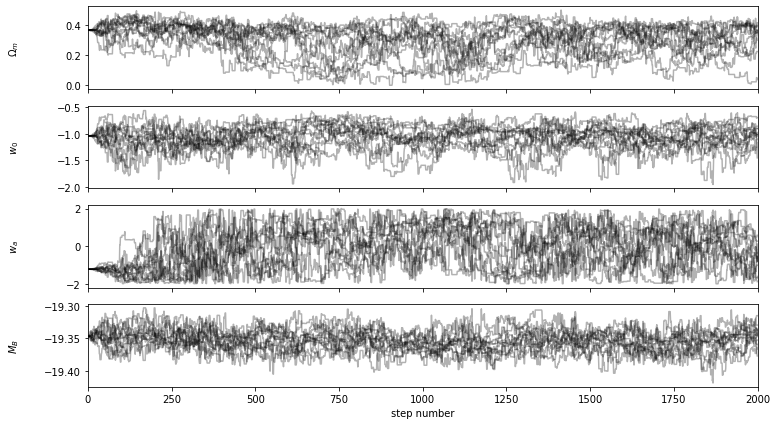

In [ ]:
# Let's check the MCMC chain: 

fig, axes = plt.subplots(4, figsize=(12, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$\Omega_m$", "$w_0$","$w_a$", "$M_B$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

(1440, 4)


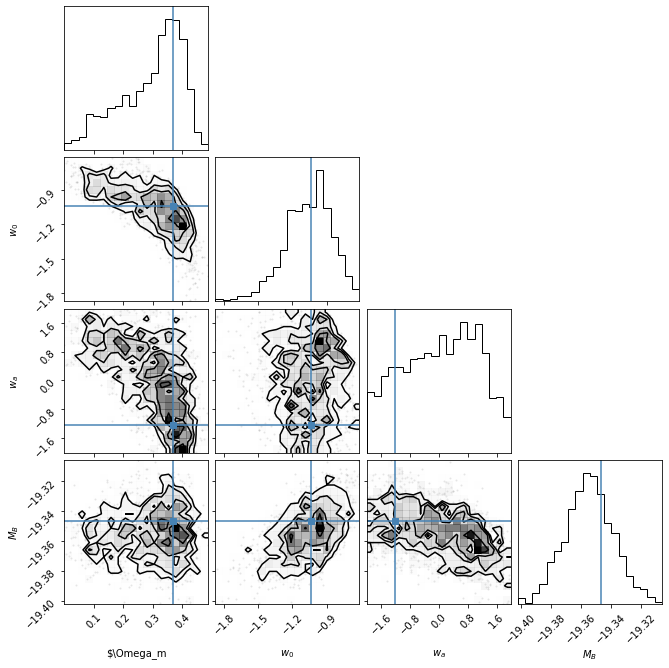

In [ ]:
# Triangle plots :

import corner

# let's throw away the first 200 iterations: 
Nburn = 200
flat_samples = sampler.get_chain(discard=Nburn, thin=15, flat=True)
print(flat_samples.shape)

fig = corner.corner(
    flat_samples, labels=labels, 
    truths=res.x # # this is the best-fit
);

In [ ]:
# find the 68% intervals around the median, i.e., 16th and 84th percentiles:
med = np.percentile(flat_samples,[16,50,84],axis=0)
print (med)

[[  0.16912765  -1.27108369  -1.18892602 -19.37066144]
 [  0.32204984  -1.04420817   0.09523801 -19.35444471]
 [  0.39414135  -0.86139042   1.12890381 -19.33834455]]


In [ ]:
x0 = med[1,:]
dx1 = x0-med[0,:]
dx2 = med[2,:]-x0

print ("1$\sigma$ confidence intervals:")
for ii, param in enumerate(labels):
  # label has the $$ symbols around the LaTeX symbol, 
  # but Math does't take the $. So we need to remove the $ from param, 
  # which is the first and last characters: 
  display(Math("{} = {:.2f}^{{+{:.2f}}}_{{-{:.2f}}}".format(param[1:-1],x0[ii],dx1[ii],dx2[ii])))



1$\sigma$ confidence intervals:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$(w_0,w_a)$ are consistent with $(-1,0)$: no sign of deviation from $\Lambda$.  